In [1]:
#@title import { form-width: "10%"}
import os
import pandas as pd
import matplotlib.pyplot as plt

## L2

In [2]:
# @title config { form-width: "10%"}
files = ["output_I2w_D2w_L22w_64", "output_I2w_D2w_L22w_128", "output_I2w_D2w_L22w_256"]
nb_arr = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
incre_arr = [2, 4, 6, 8, 10, 12, 14]

df = pd.DataFrame(columns = [
                    'Itype', 'Dtype', 'L2type', 'L2size',
                    'nb', 'incre',
                    'duration', 'access_times', 'access_cycle'
                ])

In [3]:
#@title read file { form-width: "10%"}
count = 0
for file in files:
    s = file.split('_')
    Itype, Dtype, L2type = s[1][1:], s[2][1:], s[3][2:]
    L2size = int(s[4].split('-')[0])
    with open(file+'.txt', 'r') as f:
        for nb in nb_arr:
            for incre in incre_arr:
                duration = float(f.readline().split()[-1])
                D_ren_times = float(f.readline().split()[-1])
                D_wen_times = float(f.readline().split()[-1])
                D_stall_cycles = float(f.readline().split()[-1])
                I_ren_times = float(f.readline().split()[-1])
                I_wen_times = float(f.readline().split()[-1])
                I_stall_cycles = float(f.readline().split()[-1])

                df.loc[count] = [Itype, Dtype, L2type, L2size, nb, incre,
                                 duration, (D_wen_times+I_wen_times), (D_stall_cycles+I_stall_cycles)]

                count += 1

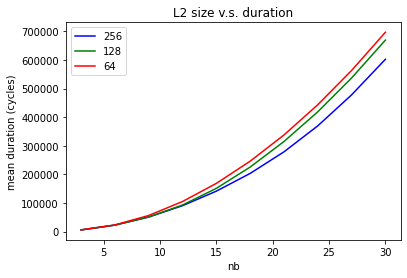

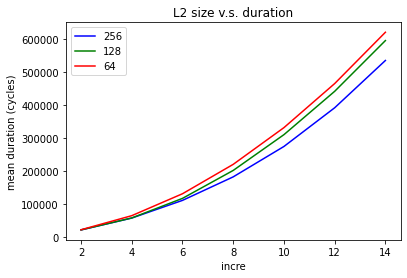

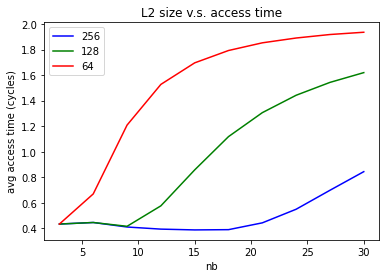

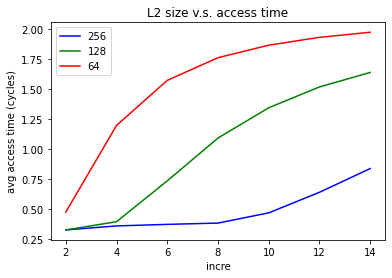

In [4]:
#@title L2size { form-width: "10%"}
%matplotlib inline
color = {
    64: 'r',
    128: 'g',
    256: 'b'
}
color_r = {
    'r': 64,
    'g': 128,
    'b': 256
}

df_size = pd.DataFrame(df.groupby(['nb', 'L2size'], as_index=False).agg({
        'duration':'mean'}))
fig, ax = plt.subplots()
df_size['color'] = df_size['L2size'].map(color)

for key, grp in df_size.groupby(['color']):
    ax = grp.plot(ax=ax, kind='line', x='nb', y='duration', c=key, label=color_r[key])
plt.xlabel('nb')
plt.ylabel('mean duration (cycles)')
plt.title('L2 size v.s. duration')
plt.show()


df_size = pd.DataFrame(df.groupby(['incre', 'L2size'], as_index=False).agg({
        'duration':'mean'}))
fig, ax = plt.subplots()
df_size['color'] = df_size['L2size'].map(color)

for key, grp in df_size.groupby(['color']):
    ax = grp.plot(ax=ax, kind='line', x='incre', y='duration', c=key, label=color_r[key])
plt.xlabel('incre')
plt.ylabel('mean duration (cycles)')
plt.title('L2 size v.s. duration')
plt.show()


df_size = pd.DataFrame(df.groupby(['nb', 'L2size'], as_index=False).agg({
    'access_times':'sum', 'access_cycle':'sum'}))
fig, ax = plt.subplots()
df_size['color'] = df_size['L2size'].map(color)
df_size['avg_access_time'] = [j / i for i, j in zip(df_size['access_times'], df_size['access_cycle'])]

for key, grp in df_size.groupby(['color']):
    ax = grp.plot(ax=ax, kind='line', x='nb', y='avg_access_time', c=key, label=color_r[key])
plt.xlabel('nb')
plt.ylabel('avg access time (cycles)')
plt.title('L2 size v.s. access time')
plt.show()


df_size = pd.DataFrame(df.groupby(['incre', 'L2size'], as_index=False).agg({
    'access_times':'sum', 'access_cycle':'sum'}))
fig, ax = plt.subplots()
df_size['color'] = df_size['L2size'].map(color)
df_size['avg_access_time'] = [j / i for i, j in zip(df_size['access_times'], df_size['access_cycle'])]

for key, grp in df_size.groupby(['color']):
    ax = grp.plot(ax=ax, kind='line', x='incre', y='avg_access_time', c=key, label=color_r[key])
plt.xlabel('incre')
plt.ylabel('avg access time (cycles)')
plt.title('L2 size v.s. access time')
plt.show()

Text(0.5, 1.0, 'cache type v.s. average access cycle')

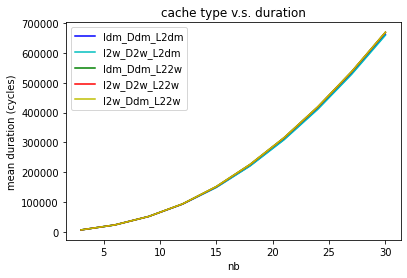

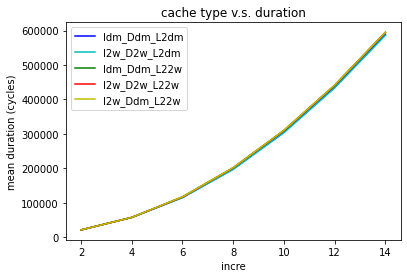

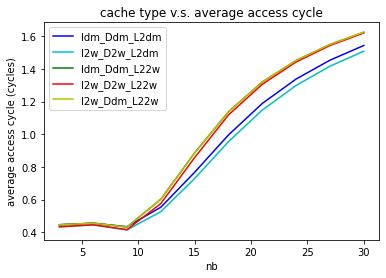

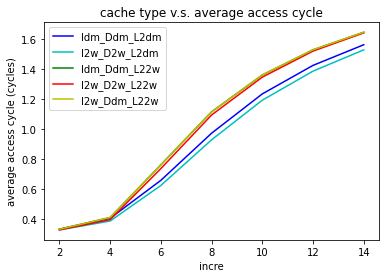

In [5]:
#@title L2 type { form-width: "10%"}
%matplotlib inline
files = ["output_I2w_D2w_L22w_128",
         "output_Idm_Ddm_L2dm_128",
         "output_Idm_Ddm_L22w_128",
         "output_I2w_D2w_L2dm_128",
         "output_I2w_Ddm_L22w_128"]


df = pd.DataFrame(columns = [
                    'Itype', 'Dtype', 'L2type', 'L2size',
                    'nb', 'incre',
                    'duration', 'access_times', 'access_cycle'
                ])
count = 0
for file in files:
    s = file.split('_')
    Itype, Dtype, L2type = s[1][1:], s[2][1:], s[3][2:]
    L2size = int(s[4].split('-')[0])
    with open(file+'.txt', 'r') as f:
        for nb in nb_arr:
            for incre in incre_arr:
                duration = float(f.readline().split()[-1])
                D_ren_times = float(f.readline().split()[-1])
                D_wen_times = float(f.readline().split()[-1])
                D_stall_cycles = float(f.readline().split()[-1])
                I_ren_times = float(f.readline().split()[-1])
                I_wen_times = float(f.readline().split()[-1])
                I_stall_cycles = float(f.readline().split()[-1])

                df.loc[count] = [Itype, Dtype, L2type, L2size, nb, incre,
                                 duration, (D_wen_times+I_wen_times), (D_stall_cycles+I_stall_cycles)]

                count += 1

color = {
    'I2w_D2w_L22w': 'r',
    'Idm_Ddm_L2dm': 'b',
    'Idm_Ddm_L22w': 'g',
    'I2w_D2w_L2dm': 'c',
    'I2w_Ddm_L22w': 'y', # y
}
color_r = {
    'r': 'I2w_D2w_L22w',
    'b': 'Idm_Ddm_L2dm',
    'g': 'Idm_Ddm_L22w',
    'c': 'I2w_D2w_L2dm',
    'y': 'I2w_Ddm_L22w',
}

df_type = pd.DataFrame(df.groupby(['nb', 'Itype', 'Dtype', 'L2type'], as_index=False).agg({'duration':'mean'}))
df_type['label'] = [f"I{i}_D{j}_L2{k}" for i, j, k in zip(df_type['Itype'], df_type['Dtype'], df_type['L2type'])]
df_type['color'] = df_type['label'].map(color)
fig, ax = plt.subplots()
for key, grp in df_type.groupby(['color']):
    ax = grp.plot(ax=ax, kind='line', x='nb', y='duration', c=key, label=color_r[key])
plt.xlabel('nb')
plt.ylabel('mean duration (cycles)')
plt.title('cache type v.s. duration')

df_type = pd.DataFrame(df.groupby(['incre', 'Itype', 'Dtype', 'L2type'], as_index=False).agg({'duration':'mean'}))
df_type['label'] = [f"I{i}_D{j}_L2{k}" for i, j, k in zip(df_type['Itype'], df_type['Dtype'], df_type['L2type'])]
df_type['color'] = df_type['label'].map(color)
fig, ax = plt.subplots()
for key, grp in df_type.groupby(['color']):
    ax = grp.plot(ax=ax, kind='line', x='incre', y='duration', c=key, label=color_r[key])
plt.xlabel('incre')
plt.ylabel('mean duration (cycles)')
plt.title('cache type v.s. duration')



df_type = pd.DataFrame(df.groupby(['nb', 'Itype', 'Dtype', 'L2type'], as_index=False).agg({
    'access_times':'sum', 'access_cycle':'sum'}))
df_type['avg_access_time'] = [j / i for i, j in zip(df_type['access_times'], df_type['access_cycle'])]
df_type['label'] = [f"I{i}_D{j}_L2{k}" for i, j, k in zip(df_type['Itype'], df_type['Dtype'], df_type['L2type'])]
df_type['color'] = df_type['label'].map(color)
fig, ax = plt.subplots()
for key, grp in df_type.groupby(['color']):
    ax = grp.plot(ax=ax, kind='line', x='nb', y='avg_access_time', c=key, label=color_r[key])
plt.xlabel('nb')
plt.ylabel('average access cycle (cycles)')
plt.title('cache type v.s. average access cycle')


df_type = pd.DataFrame(df.groupby(['incre', 'Itype', 'Dtype', 'L2type'], as_index=False).agg({
    'access_times':'sum', 'access_cycle':'sum'}))
df_type['avg_access_time'] = [j / i for i, j in zip(df_type['access_times'], df_type['access_cycle'])]
df_type['label'] = [f"I{i}_D{j}_L2{k}" for i, j, k in zip(df_type['Itype'], df_type['Dtype'], df_type['L2type'])]
df_type['color'] = df_type['label'].map(color)
fig, ax = plt.subplots()
for key, grp in df_type.groupby(['color']):
    ax = grp.plot(ax=ax, kind='line', x='incre', y='avg_access_time', c=key, label=color_r[key])
plt.xlabel('incre')
plt.ylabel('average access cycle (cycles)')
plt.title('cache type v.s. average access cycle')

## BrPred

In [6]:
#@title config { form-width: "10%"}
files = ["output_predictor_v1",
         "output_predictor_v2",
         "output_bht_1bit",
         "output_bht_2bit"]
a_arr = [float(10*i) for i in range(1, 11)]
b_arr = [float(10*i) for i in range(1, 11)]
c_arr = [float(10*i) for i in range(1, 11)]
df = pd.DataFrame(columns = ['type',
                    'a', 'b', 'c',
                    'duration', 'br_times', 'wrong_times'
                ])

In [7]:
#@title read file { form-width: "10%"}
count = 0
for file in files:
    pred_type = file[7:]
    with open(file+'.txt', 'r') as f:
        for a in a_arr:
            for b in b_arr:
                for c in c_arr:
                    duration = float(f.readline().split()[-1])
                    br_times = float(f.readline().split()[-1])
                    wrong_times = float(f.readline().split()[-1])
                    df.loc[count] = [pred_type, a, b, c, duration, br_times, wrong_times]
                    count += 1

           type  br_times  wrong_times
0      bht_1bit  219000.0       8000.0
1      bht_2bit  219000.0     112000.0
2  predictor_v1  219000.0     112000.0
3  predictor_v2  219000.0      60000.0


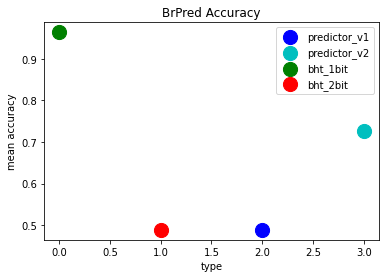

bht_1bit	0.963470
bht_2bit	0.488584
predictor_v1	0.488584
predictor_v2	0.726027


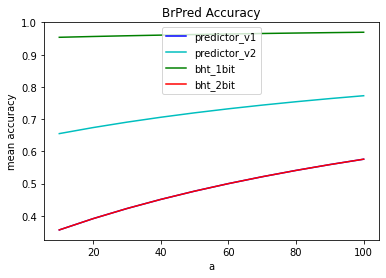

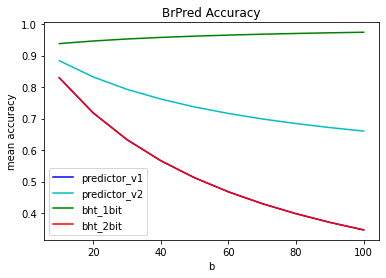

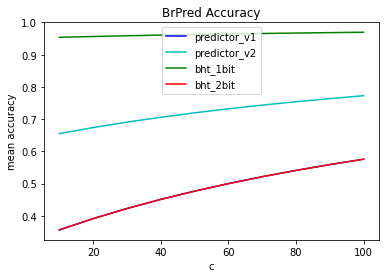

In [8]:
#@title BrPred { form-width: "10%"}
%matplotlib inline
color = {
    'predictor_v1': 'b',
    'predictor_v2': 'c',
    'bht_1bit': 'g',
    'bht_2bit': 'r',
}
color_r = {
    'b': 'predictor_v1',
    'c': 'predictor_v2',
    'g': 'bht_1bit',
    'r': 'bht_2bit',
}
xx_x = {
    'b': 1,
    'c': 2,
    'g': 3,
    'r': 4,
}


df_pred = pd.DataFrame(df.groupby(['type'], as_index=False).agg({
        'br_times':'sum', 'wrong_times':'sum'}))
print(df_pred.head(10))
df_pred['accuracy'] = [1-j/i for i, j in zip(df_pred['br_times'], df_pred['wrong_times'])]
df_pred['color'] = df_pred['type'].map(color)
df_pred['idxx'] = [0, 1, 2, 3]

fig, ax = plt.subplots()
for key, grp in df_pred.groupby(['color']):
    ax = grp.plot(ax=ax, kind='scatter', x='idxx', y='accuracy', color=key, label=color_r[key], s=200)



plt.xlabel('type')
plt.ylabel('mean accuracy')
plt.title('BrPred Accuracy')
plt.show()


for a, b in zip(list(df_pred['type']), list(df_pred['accuracy'])):
    print(f"{a}\t{b:.6f}")




df_pred = pd.DataFrame(df.groupby(['a', 'type'], as_index=False).agg({
        'br_times':'sum', 'wrong_times':'sum'}))
df_pred['accuracy'] = [1-j/i for i, j in zip(df_pred['br_times'], df_pred['wrong_times'])]
df_pred['color'] = df_pred['type'].map(color)

fig, ax = plt.subplots()
for key, grp in df_pred.groupby(['color']):
    ax = grp.plot(ax=ax, kind='line', x='a', y='accuracy', c=key, label=color_r[key])
plt.xlabel('a')
plt.ylabel('mean accuracy')
plt.title('BrPred Accuracy')
plt.show()



df_pred = pd.DataFrame(df.groupby(['b', 'type'], as_index=False).agg({
        'br_times':'sum', 'wrong_times':'sum'}))
df_pred['accuracy'] = [1-j/i for i, j in zip(df_pred['br_times'], df_pred['wrong_times'])]
df_pred['color'] = df_pred['type'].map(color)

fig, ax = plt.subplots()
for key, grp in df_pred.groupby(['color']):
    ax = grp.plot(ax=ax, kind='line', x='b', y='accuracy', c=key, label=color_r[key])
plt.xlabel('b')
plt.ylabel('mean accuracy')
plt.title('BrPred Accuracy')
plt.show()



df_pred = pd.DataFrame(df.groupby(['c', 'type'], as_index=False).agg({
        'br_times':'sum', 'wrong_times':'sum'}))
df_pred['accuracy'] = [1-j/i for i, j in zip(df_pred['br_times'], df_pred['wrong_times'])]
df_pred['color'] = df_pred['type'].map(color)

fig, ax = plt.subplots()
for key, grp in df_pred.groupby(['color']):
    ax = grp.plot(ax=ax, kind='line', x='c', y='accuracy', c=key, label=color_r[key])
plt.xlabel('c')
plt.ylabel('mean accuracy')
plt.title('BrPred Accuracy')
plt.show()
